In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from skeletonpose import PoseEstimator
from skeletonpose import plot_keypoints, img_show

In [3]:
import torch
import cv2
from mmdet.apis import init_detector
from mmpose.apis import init_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

img_path = "../examples/img1.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

device: cuda:0


In [4]:
POSE_CONFIG = "../../checkpoints/rtmpose-m_8xb256-420e_coco-256x192.py"
POSE_CHECKPOINT = "../../checkpoints/rtmpose-m_simcc-coco_pt-aic-coco_420e-256x192-d8dd5ca4_20230127.pth"
DET_CONFIG = "../../checkpoints/rtmdet_m_8xb32-300e_coco.py"
DET_CHECKPOINT = "../../checkpoints/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth"

In [5]:
pose_model = init_model(POSE_CONFIG, POSE_CHECKPOINT, device=device)
det_model = init_detector(DET_CONFIG, DET_CHECKPOINT, device=device)

Loads checkpoint by local backend from path: ../../checkpoints/rtmpose-m_simcc-coco_pt-aic-coco_420e-256x192-d8dd5ca4_20230127.pth
Loads checkpoint by local backend from path: ../../checkpoints/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [6]:
pose_estimator = PoseEstimator(pose_model, det_model)

In [7]:
results = pose_estimator.predict(img_path)

10/18 11:23:58 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".


In [8]:
keypoints = pose_estimator.get_keypoints(results[0])
bbox = pose_estimator.get_bbox(results[0])

In [9]:
drew_keypoints_img = plot_keypoints(img, keypoints, bbox)

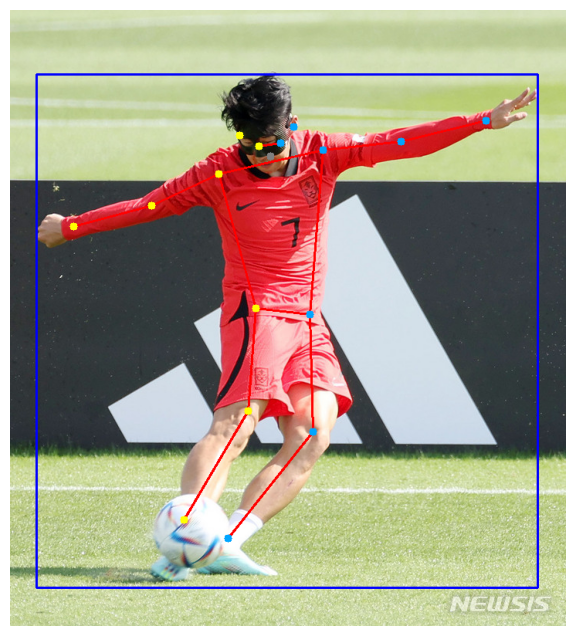

In [10]:
img_show(drew_keypoints_img)